In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
import warnings 

In [35]:
warnings.filterwarnings('ignore')

In [36]:
df_de_taquilla = pd.read_csv('boxoffice.csv',encoding ='latin-1')
df_de_taquilla.head()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,Star Wars: Episode VIII - The Last Jedi,"$620,181,382","$1,332,539,889",Walt Disney Studios Motion Pictures,"$220,009,584","4,232","$317,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi",382
1,The Fate of the Furious,"$226,008,385","$1,236,005,118",Universal Pictures,"$98,786,705","4,310","$250,000,000",PG-13,"Action,Adventure,Thriller",262
2,Wonder Woman,"$412,563,408","$821,847,012",Warner Bros.,"$103,251,471","4,165","$149,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi,War",217
3,Guardians of the Galaxy Vol. 2,"$389,813,101","$863,756,051",Walt Disney Studios Motion Pictures,"$146,510,104","4,347","$200,000,000",PG-13,"Action,Adventure,Comedy,Sci-Fi",241
4,Beauty and the Beast,"$504,014,165","$1,263,521,126",Walt Disney Studios Motion Pictures,"$174,750,616","4,210","$160,000,000",PG,"Family,Fantasy,Musical,Romance",290


In [37]:
forma = df_de_taquilla.shape
print(forma)
info = df_de_taquilla.info()

(2694, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   object
 2   world_revenue     2694 non-null   object
 3   distributor       2694 non-null   object
 4   opening_revenue   2390 non-null   object
 5   opening_theaters  2383 non-null   object
 6   budget            397 non-null    object
 7   MPAA              1225 non-null   object
 8   genres            2655 non-null   object
 9   release_days      2694 non-null   object
dtypes: object(10)
memory usage: 210.6+ KB


In [38]:
df_de_taquilla.describe().T

,count,unique,top,freq
title,2694,2468,A Beautiful Planet,3
domestic_revenue,2694,2495,"$11,272,008",3
world_revenue,2694,2501,"$25,681,505",3
distributor,2694,248,Fathom Events,292
opening_revenue,2390,2176,"$4,696",3
opening_theaters,2383,732,1,503
budget,397,124,"$40,000,000",14
MPAA,1225,8,R,568
genres,2655,567,Documentary,351
release_days,2694,457,347,35


In [39]:
quitar = ['world_revenue','opening_revenue']

df_de_taquilla.drop(quitar,axis=1,inplace = True)

In [20]:
df_de_taquilla.isnull().sum() * 100 / df_de_taquilla.shape[0]


title                0.000000
domestic_revenue     0.000000
distributor          0.000000
opening_theaters    11.544172
budget              85.263549
MPAA                54.528582
genres               1.447661
release_days         0.000000
dtype: float64

In [21]:
df_de_taquilla.drop('budget',axis=1, inplace=True)

In [22]:
for col in ['MPAA','genres']:
    df_de_taquilla[col] =df_de_taquilla[col].fillna(df_de_taquilla[col].mode()[0])

df_de_taquilla.dropna(inplace=True)
df_de_taquilla.isnull().sum().sum()

0

In [23]:
df_de_taquilla['domestic_revenue']=df_de_taquilla['domestic_revenue'].str[1:]

for col in ['domestic_revenue','opening_theaters','release_days']:
    df_de_taquilla[col]= df_de_taquilla[col].str.replace(',', '')
    #filas con valores no null en las columnas que estudiamos 

    temp = (~df_de_taquilla[col].isnull())
    df_de_taquilla[temp][col] = df_de_taquilla[temp][col].convert_dtypes(float)

    df_de_taquilla[col]= pd.to_numeric(df_de_taquilla[col], errors = 'coerce')

In [24]:
df_de_taquilla.head()

,title,domestic_revenue,distributor,opening_theaters,MPAA,genres,release_days
0,Star Wars: Episode VIII - The Last Jedi,620181382,Walt Disney Studios Motion Pictures,4232,PG-13,"Action,Adventure,Fantasy,Sci-Fi",382
1,The Fate of the Furious,226008385,Universal Pictures,4310,PG-13,"Action,Adventure,Thriller",262
2,Wonder Woman,412563408,Warner Bros.,4165,PG-13,"Action,Adventure,Fantasy,Sci-Fi,War",217
3,Guardians of the Galaxy Vol. 2,389813101,Walt Disney Studios Motion Pictures,4347,PG-13,"Action,Adventure,Comedy,Sci-Fi",241
4,Beauty and the Beast,504014165,Walt Disney Studios Motion Pictures,4210,PG,"Family,Fantasy,Musical,Romance",290


In [25]:
df_de_taquilla.describe().T

,count,mean,std,min,25%,50%,75%,max
domestic_revenue,2383.0,1.904864e+07,6.244193e+07,147.0,34519.0,272132.0,5080868.5,858373000.0
opening_theaters,2383.0,6.594830e+02,1.245347e+03,1.0,2.0,8.0,521.5,4725.0
release_days,2383.0,2.973563e+02,3.970007e+02,12.0,144.0,256.0,354.0,6507.0


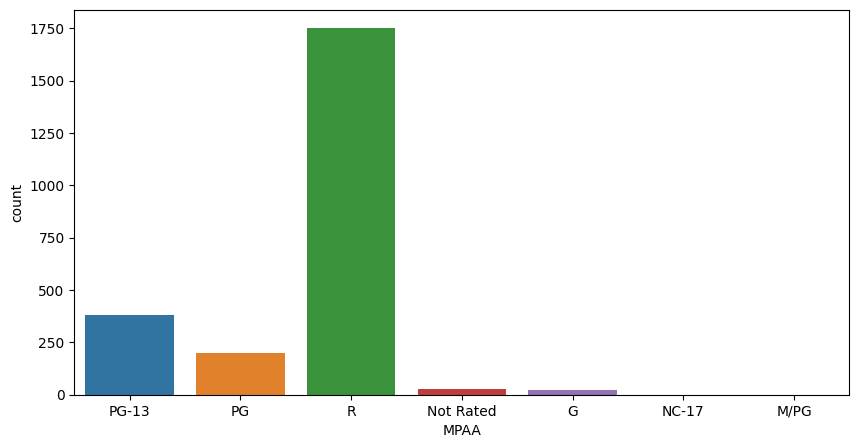

In [26]:
plt.figure(figsize=(10,5))
sb.countplot(df_de_taquilla['MPAA'])
plt.show()

In [33]:

"""
Aqui hubo un problema, en el mean hay que poner el argumento ese sino no funciona 
"""
df_de_taquilla.groupby('MPAA').mean(numeric_only=True)['domestic_revenue']


MPAA
G            3.539276e+07
M/PG         5.113500e+05
NC-17        1.368800e+04
Not Rated    4.897703e+05
PG           5.379622e+07
PG-13        5.891966e+07
R            6.591336e+06
Name: domestic_revenue, dtype: float64

ValueError: could not convert string to float: '$620,181,382'

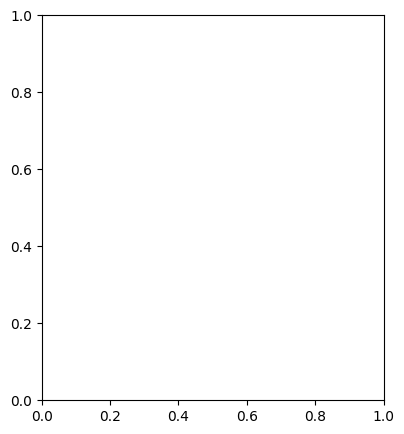

In [40]:
plt.subplots(figsize=(15,5))

features = ['domestic_revenue','opening_theaters','release_days']
for i,col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sb.distplot(df_de_taquilla[col])

plt.tight_layout()
plt.show()